# CSC 180 - Project 2: Network Intrusion Detection System
### Savanna Guertin (ID: 219448412)
### Andrew Pascual (ID : 219494575)

In [1]:
import numpy as np
import pandas as pd
import csv
import math

## Reading the Data

In [2]:
filename_read = "network_intrusion_data.csv"

df = pd.read_csv(filename_read, na_values=['NA', '?', 'empty', 'not available'])

df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_filed_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_filed_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [3]:
print(df.shape)

df.head(15)

(494020, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,210,624,0,0,0,0,...,109,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal.


In [4]:
# showing all of the different outcomes. Either normal or a specific intrusion
print(df['outcome'].nunique()) # number of outcomes

df['outcome'].unique()

23


array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

## Data Preprocessing

In [5]:
df.isnull().sum().sum()

# there seem to be no missing values so there are no rows to remove

0

In [6]:
df = df.drop_duplicates() # dropping all duplicate rows

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [7]:
#Checking how many rows are left after dropping duplicates
print(df.shape)

(145585, 42)


## Label Encoding the Outcomes

In [8]:
def outcome_encode(x):
    '''Label Encoding Function: labels normal connections as 0 and any intrusion as 1'''
    if x == 'normal.' or x == 0:
        return 0
    else:
        return 1

In [9]:
df['outcome'] = df['outcome'].map(outcome_encode)

df[df['outcome'] == 1] # looking at the rows where there are intrusions

#df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
743,184,tcp,telnet,SF,1511,2957,0,0,0,3,...,3,1.00,0.00,1.00,0.67,0.0,0.00,0.0,0.0,1
744,305,tcp,telnet,SF,1735,2766,0,0,0,3,...,4,1.00,0.00,0.50,0.50,0.0,0.00,0.0,0.0,1
4048,79,tcp,telnet,SF,281,1301,0,0,0,2,...,10,1.00,0.00,1.00,0.30,0.0,0.00,0.0,0.1,1
4112,25,tcp,telnet,SF,269,2333,0,0,0,0,...,2,0.03,0.06,0.01,0.00,0.0,0.00,0.0,0.0,1
7600,0,tcp,telnet,S0,0,0,0,0,0,0,...,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490959,0,udp,private,SF,28,0,0,3,0,0,...,96,0.38,0.01,0.38,0.00,0.0,0.00,0.0,0.0,1
490960,0,udp,private,SF,28,0,0,3,0,0,...,97,0.38,0.01,0.38,0.00,0.0,0.00,0.0,0.0,1
490961,0,udp,private,SF,28,0,0,3,0,0,...,98,0.38,0.01,0.38,0.00,0.0,0.00,0.0,0.0,1
490962,0,udp,private,SF,28,0,0,3,0,0,...,99,0.39,0.01,0.39,0.00,0.0,0.00,0.0,0.0,1


## Encode categorical features and normalize numeric features

In [10]:
#Get ready for normalizing data
from sklearn import preprocessing

def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low
    
    # Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [11]:
# These are all the numerical columns
cols_to_norm = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment','urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_filed_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome']

In [12]:
#Encode Numerical columns
encode_numeric_range(df, 'duration')
encode_numeric_range(df, 'src_bytes')
encode_numeric_range(df, 'dst_bytes')
encode_numeric_range(df, 'land')
encode_numeric_range(df, 'urgent')
encode_numeric_range(df, 'hot')
encode_numeric_range(df, 'num_failed_logins')
encode_numeric_range(df, 'logged_in')
encode_numeric_range(df, 'num_compromised')
encode_numeric_range(df, 'root_shell')
encode_numeric_range(df, 'su_attempted')
encode_numeric_range(df, 'num_root')
encode_numeric_range(df, 'num_filed_creations')
encode_numeric_range(df, 'num_shells')
encode_numeric_range(df, 'num_access_files')
encode_numeric_range(df, 'num_outbound_cmds')
encode_numeric_range(df, 'is_host_login')
encode_numeric_range(df, 'is_guest_login')
encode_numeric_range(df, 'count')
encode_numeric_range(df, 'srv_count')
encode_numeric_range(df, 'serror_rate')
encode_numeric_range(df, 'srv_serror_rate')
encode_numeric_range(df, 'rerror_rate')
encode_numeric_range(df, 'srv_rerror_rate')
encode_numeric_range(df, 'same_srv_rate')
encode_numeric_range(df, 'diff_srv_rate')
encode_numeric_range(df, 'srv_diff_host_rate')
encode_numeric_range(df, 'dst_host_srv_count')
encode_numeric_range(df, 'dst_host_same_srv_rate')
encode_numeric_range(df, 'dst_host_diff_srv_rate')
encode_numeric_range(df, 'dst_host_same_src_port_rate')
encode_numeric_range(df, 'dst_host_srv_diff_host_rate')
encode_numeric_range(df, 'dst_host_serror_rate')
encode_numeric_range(df, 'dst_host_srv_serror_rate')
encode_numeric_range(df, 'dst_host_rerror_rate')
encode_numeric_range(df, 'dst_host_srv_rerror_rate')

In [13]:
#Encode categorical columns
encode_text_index(df,'protocol_type')
encode_text_index(df,'service')
encode_text_index(df,'flag')

array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
       'SF', 'SH'], dtype=object)

In [14]:
#Check any null COLUMNS before model training
df.isnull().sum()

duration                            0
protocol_type                       0
service                             0
flag                                0
src_bytes                           0
dst_bytes                           0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_root                            0
num_filed_creations                 0
num_shells                          0
num_access_files                    0
num_outbound_cmds              145585
is_host_login                  145585
is_guest_login                      0
count                               0
srv_count                           0
serror_rate                         0
srv_serror_rate                     0
rerror_rate 

In [15]:
#Removing these null columns before model training. 
#After running these lines, we will get an error for trying to encode the numerical categories above again.
df.drop('num_outbound_cmds', axis=1, inplace=True)

In [16]:
df.drop('is_host_login', axis=1, inplace=True)

In [17]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_filed_creations            0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

## Splitting the data to train / test 

In [18]:
#Prepare the X and Y
x_df = df.drop('outcome', 1)
x = x_df.values
y = df['outcome'].values
x.shape, y.shape

((145585, 39), (145585,))

In [19]:
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116468, 39), (29117, 39), (116468,), (29117,))

In [20]:
from collections.abc import Sequence

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

### FNN Train and Test

In [21]:
outcome = encode_text_index(df,"outcome")

fnn_x, fnn_y = to_xy(df, 'outcome')

fnn_x_train, fnn_x_test, fnn_y_train, fnn_y_test = train_test_split(fnn_x, fnn_y, test_size=0.20, random_state=42)

In [22]:
fnn_x.shape, fnn_y.shape

((145585, 39), (145585, 2))

## Building Model Functions

In [87]:
import random

def activation_function():
    choice = random.choice(['relu', 'sigmoid', 'tanh'])
    print("activation function: " + choice)
    return choice

# building a fully connected neural network
def build_fcnn_model():
    model = Sequential()
    
    number_of_neurons = random.randint(0, 91)+10
    
    print("Input Layer: ")
    model.add(Dense(number_of_neurons, input_dim=fnn_x_train.shape[1], activation=activation_function()))
    print(" ")
    
    number_of_layers = random.randint(1, 5)
    print("Number of layers: %d" % (number_of_layers))
    
    for i in range(number_of_layers):
        number_of_neurons = random.randint(0, (number_of_layers-i)*20)+10
        print("Number of neurons: %d" % (number_of_neurons))
        
        print("Hidden Layer %d:" % (i))
        model.add(Dense(number_of_neurons, activation=activation_function()))
        
    model.add(Dense(2, activation='softmax'))
    
    optimi_choice = random.choice(['adam', 'sgd'])
    print("Optimizer: " + optimi_choice)
    
    model.compile(loss='binary_crossentropy', optimizer=optimi_choice)
    
    return model

## CNN Setup

In [24]:
# Load modules
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [25]:
# Define batch_size and # of epochs
batch_size = 128
# define input image dimensions
img_rows, img_cols = 28, 28

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (116468, 39)
Shape of y_train: (116468,)

Shape of x_test: (29117, 39)
Shape of y_test: (29117,)


In [27]:
y_train

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [28]:
#Reshape 2D
cnn_x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], 1)
cnn_x_test = x_test.reshape(x_test.shape[0], 1 , x_test.shape[1], 1)

print("Shape of x_train: {}".format(cnn_x_train.shape))
print("Shape of x_test: {}".format(cnn_x_test.shape))

Shape of x_train: (116468, 1, 39, 1)
Shape of x_test: (29117, 1, 39, 1)


In [29]:
num_classes = 2  # it should be 2 classes, either 0 for normal or 1 for intrusion

# Converts a class vector (integers) to binary class matrix.   One-hot encoding!  Use with categorical_crossentropy.
cnn_y_train = tf.keras.utils.to_categorical(y_train, num_classes)
cnn_y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [30]:
pd.DataFrame(cnn_y_train)

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
116463,0.0,1.0
116464,0.0,1.0
116465,0.0,1.0
116466,0.0,1.0


### CNN One

In [31]:
# define a CNN

cnn_1 = Sequential()
cnn_1.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=(1, 39, 1)))

cnn_1.add(MaxPooling2D(pool_size=(1,2)))

cnn_1.add(Conv2D(128, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu'))
cnn_1.add(MaxPooling2D(pool_size=(1,2)))
    
    
cnn_1.add(Flatten())
cnn_1.add(Dense(1024, activation="relu"))
cnn_1.add(Dropout(0.5))
cnn_1.add(Dense(2, activation="softmax"))

cnn_1.compile(loss="binary_crossentropy", optimizer="adam")

In [32]:
cnn_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 37, 64)         256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 18, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 16, 128)        24704     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [33]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=2, mode='auto')

cnn_1.fit(cnn_x_train[0:600], cnn_y_train[0:600],     
          batch_size=batch_size,
          epochs=100,
          verbose=2,
          validation_data=(cnn_x_test, cnn_y_test),
          callbacks=[monitor])

Epoch 1/100
5/5 - 3s - loss: 4.6623 - val_loss: 3.8319
Epoch 2/100
5/5 - 2s - loss: 2.4724 - val_loss: 1.3780
Epoch 3/100
5/5 - 1s - loss: 0.9807 - val_loss: 0.7338
Epoch 4/100
5/5 - 2s - loss: 0.7326 - val_loss: 0.4631
Epoch 5/100
5/5 - 1s - loss: 0.4461 - val_loss: 0.3291
Epoch 6/100
5/5 - 1s - loss: 0.3343 - val_loss: 0.2190
Epoch 7/100
5/5 - 1s - loss: 0.2272 - val_loss: 0.1663
Epoch 8/100
5/5 - 1s - loss: 0.1747 - val_loss: 0.1481
Epoch 9/100
5/5 - 1s - loss: 0.1501 - val_loss: 0.1368
Epoch 10/100
5/5 - 1s - loss: 0.1358 - val_loss: 0.1296
Epoch 11/100
5/5 - 1s - loss: 0.1282 - val_loss: 0.1279
Epoch 12/100
5/5 - 1s - loss: 0.1202 - val_loss: 0.1204
Epoch 13/100
5/5 - 1s - loss: 0.1100 - val_loss: 0.1192
Epoch 14/100
5/5 - 1s - loss: 0.0981 - val_loss: 0.1104
Epoch 15/100
5/5 - 1s - loss: 0.1099 - val_loss: 0.1054
Epoch 16/100
5/5 - 1s - loss: 0.0895 - val_loss: 0.1014
Epoch 17/100
5/5 - 1s - loss: 0.0798 - val_loss: 0.0982
Epoch 18/100
5/5 - 1s - loss: 0.0883 - val_loss: 0.0946
E

In [34]:
from sklearn import metrics

y_true = np.argmax(cnn_y_test[0:500],axis=1)
cnn_pred = cnn_1.predict(cnn_x_test[0:500])
cnn_pred = np.argmax(cnn_pred,axis=1)


score = metrics.accuracy_score(y_true, cnn_pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, cnn_pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, cnn_pred))

Accuracy: 0.984
Averaged F1: 0.9839591312041936
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       298
           1       0.99      0.97      0.98       202

    accuracy                           0.98       500
   macro avg       0.99      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [104]:
#cnn_1.save("cnn_1.hdf5")

### CNN Two

In [35]:
# define a CNN

cnn_2 = Sequential()
cnn_2.add(Conv2D(64, kernel_size=(1, 2), strides=(1, 1),
                 activation='relu',
                 input_shape=(1, 39, 1)))

cnn_2.add(MaxPooling2D(pool_size=(1,2)))

cnn_2.add(Conv2D(128, kernel_size=(1, 2), strides=(1, 1),
                 activation='tanh'))
cnn_2.add(MaxPooling2D(pool_size=(1,2)))

cnn_2.add(Conv2D(256, kernel_size=(1, 3), strides=(1, 1),
                 activation='sigmoid'))
cnn_2.add(MaxPooling2D(pool_size=(1,2)))

    
cnn_2.add(Flatten())
cnn_2.add(Dense(1024, activation="relu"))
cnn_2.add(Dropout(0.5))
cnn_2.add(Dense(2, activation="softmax"))

cnn_2.compile(loss="binary_crossentropy", optimizer="adam")

In [36]:
cnn_2.fit(cnn_x_train[0:600], cnn_y_train[0:600],     
          batch_size=batch_size,
          epochs=100,
          verbose=2,
          validation_data=(cnn_x_test, cnn_y_test),
          callbacks=[monitor])

Epoch 1/100
5/5 - 2s - loss: 1.0656 - val_loss: 0.9795
Epoch 2/100
5/5 - 2s - loss: 0.8571 - val_loss: 0.7668
Epoch 3/100
5/5 - 2s - loss: 0.7229 - val_loss: 0.6602
Epoch 4/100
5/5 - 2s - loss: 0.6616 - val_loss: 0.6023
Epoch 5/100
5/5 - 2s - loss: 0.6016 - val_loss: 0.5659
Epoch 6/100
5/5 - 2s - loss: 0.5465 - val_loss: 0.4958
Epoch 7/100
5/5 - 2s - loss: 0.4767 - val_loss: 0.4064
Epoch 8/100
5/5 - 2s - loss: 0.3719 - val_loss: 0.2959
Epoch 9/100
5/5 - 2s - loss: 0.2596 - val_loss: 0.2051
Epoch 10/100
5/5 - 2s - loss: 0.1845 - val_loss: 0.1576
Epoch 11/100
5/5 - 2s - loss: 0.1533 - val_loss: 0.1384
Epoch 12/100
5/5 - 2s - loss: 0.1442 - val_loss: 0.1304
Epoch 13/100
5/5 - 2s - loss: 0.1355 - val_loss: 0.1253
Epoch 14/100
5/5 - 2s - loss: 0.1258 - val_loss: 0.1202
Epoch 15/100
5/5 - 2s - loss: 0.1105 - val_loss: 0.1169
Epoch 16/100
5/5 - 2s - loss: 0.1032 - val_loss: 0.1135
Epoch 17/100
5/5 - 2s - loss: 0.1051 - val_loss: 0.1110
Epoch 18/100
5/5 - 2s - loss: 0.1063 - val_loss: 0.1104
E

In [37]:
cnn_pred = cnn_2.predict(cnn_x_test[0:500])
cnn_pred = np.argmax(cnn_pred,axis=1)


score = metrics.accuracy_score(y_true, cnn_pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, cnn_pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, cnn_pred))

Accuracy: 0.982
Averaged F1: 0.9819620932530995
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       298
           1       0.99      0.97      0.98       202

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



### CNN Three

In [38]:
# define a CNN

cnn_3 = Sequential()
cnn_3.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=(1, 39, 1)))

cnn_3.add(MaxPooling2D(pool_size=(1,2)))

cnn_3.add(Conv2D(128, kernel_size=(1, 3), strides=(1, 1),
                 activation='tanh'))
cnn_3.add(MaxPooling2D(pool_size=(1,2)))

cnn_3.add(Conv2D(256, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu'))
cnn_3.add(MaxPooling2D(pool_size=(1,2)))

    
cnn_3.add(Flatten())
cnn_3.add(Dense(1024, activation="relu"))
cnn_3.add(Dropout(0.5))
cnn_3.add(Dense(2, activation="softmax"))

cnn_3.compile(loss="binary_crossentropy", optimizer="sgd")

In [39]:
cnn_3.fit(cnn_x_train[0:600], cnn_y_train[0:600],     
          batch_size=batch_size,
          epochs=100,
          verbose=2,
          validation_data=(cnn_x_test, cnn_y_test),
          callbacks=[monitor])

Epoch 1/100
5/5 - 2s - loss: 0.7097 - val_loss: 0.6696
Epoch 2/100
5/5 - 2s - loss: 0.6703 - val_loss: 0.6425
Epoch 3/100
5/5 - 2s - loss: 0.6498 - val_loss: 0.6239
Epoch 4/100
5/5 - 2s - loss: 0.6333 - val_loss: 0.6046
Epoch 5/100
5/5 - 2s - loss: 0.6077 - val_loss: 0.5925
Epoch 6/100
5/5 - 2s - loss: 0.6032 - val_loss: 0.5772
Epoch 7/100
5/5 - 2s - loss: 0.5831 - val_loss: 0.5617
Epoch 8/100
5/5 - 2s - loss: 0.5691 - val_loss: 0.5475
Epoch 9/100
5/5 - 2s - loss: 0.5642 - val_loss: 0.5341
Epoch 10/100
5/5 - 2s - loss: 0.5449 - val_loss: 0.5476
Epoch 11/100
5/5 - 2s - loss: 0.5407 - val_loss: 0.5096
Epoch 12/100
5/5 - 2s - loss: 0.5161 - val_loss: 0.4959
Epoch 13/100
5/5 - 2s - loss: 0.5001 - val_loss: 0.4859
Epoch 14/100
5/5 - 2s - loss: 0.4922 - val_loss: 0.4712
Epoch 15/100
5/5 - 2s - loss: 0.4777 - val_loss: 0.4819
Epoch 16/100
5/5 - 2s - loss: 0.4794 - val_loss: 0.4534
Epoch 17/100
5/5 - 2s - loss: 0.4542 - val_loss: 0.4379
Epoch 18/100
5/5 - 2s - loss: 0.4430 - val_loss: 0.4277
E

In [40]:
cnn_pred = cnn_3.predict(cnn_x_test[0:500])
cnn_pred = np.argmax(cnn_pred,axis=1)


score = metrics.accuracy_score(y_true, cnn_pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, cnn_pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, cnn_pred))

Accuracy: 0.966
Averaged F1: 0.9657246818501798
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       298
           1       1.00      0.92      0.96       202

    accuracy                           0.97       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.97      0.97      0.97       500



### CNN Four

In [41]:
# define a CNN

cnn_4 = Sequential()
cnn_4.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=(1, 39, 1)))

cnn_4.add(MaxPooling2D(pool_size=(1,2)))

cnn_4.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu'))
cnn_4.add(MaxPooling2D(pool_size=(1,2)))

cnn_4.add(Conv2D(128, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu'))
cnn_4.add(MaxPooling2D(pool_size=(1,2)))

    
cnn_4.add(Flatten())
cnn_4.add(Dense(1024, activation="relu"))
cnn_4.add(Dropout(0.5))
cnn_4.add(Dense(2, activation="softmax"))

cnn_4.compile(loss="binary_crossentropy", optimizer="adam")

In [42]:
cnn_4.fit(cnn_x_train[0:600], cnn_y_train[0:600],     
          batch_size=batch_size,
          epochs=100,
          verbose=2,
          validation_data=(cnn_x_test, cnn_y_test),
          callbacks=[monitor])

Epoch 1/100
5/5 - 1s - loss: 2.4274 - val_loss: 1.9279
Epoch 2/100
5/5 - 1s - loss: 1.4138 - val_loss: 0.7714
Epoch 3/100
5/5 - 1s - loss: 0.7632 - val_loss: 0.5124
Epoch 4/100
5/5 - 1s - loss: 0.5032 - val_loss: 0.3295
Epoch 5/100
5/5 - 1s - loss: 0.3407 - val_loss: 0.2436
Epoch 6/100
5/5 - 1s - loss: 0.2437 - val_loss: 0.1978
Epoch 7/100
5/5 - 1s - loss: 0.1904 - val_loss: 0.1755
Epoch 8/100
5/5 - 1s - loss: 0.1677 - val_loss: 0.1614
Epoch 9/100
5/5 - 1s - loss: 0.1543 - val_loss: 0.1511
Epoch 10/100
5/5 - 1s - loss: 0.1479 - val_loss: 0.1413
Epoch 11/100
5/5 - 1s - loss: 0.1315 - val_loss: 0.1372
Epoch 12/100
5/5 - 1s - loss: 0.1323 - val_loss: 0.1378
Epoch 13/100
5/5 - 1s - loss: 0.1212 - val_loss: 0.1231
Epoch 14/100
5/5 - 1s - loss: 0.1097 - val_loss: 0.1237
Epoch 15/100
5/5 - 1s - loss: 0.1043 - val_loss: 0.1156
Epoch 16/100
5/5 - 1s - loss: 0.1015 - val_loss: 0.1100
Epoch 17/100
5/5 - 1s - loss: 0.0960 - val_loss: 0.1044
Epoch 18/100
5/5 - 1s - loss: 0.0888 - val_loss: 0.1034
E

In [43]:
cnn_pred = cnn_4.predict(cnn_x_test[0:500])
cnn_pred = np.argmax(cnn_pred,axis=1)


score = metrics.accuracy_score(y_true, cnn_pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, cnn_pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, cnn_pred))

Accuracy: 0.982
Averaged F1: 0.9819777434543857
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       298
           1       0.98      0.97      0.98       202

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



### CNN Five

In [44]:
# define a CNN

cnn_5 = Sequential()
cnn_5.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=(1, 39, 1)))

cnn_5.add(MaxPooling2D(pool_size=(1,2)))

cnn_5.add(Conv2D(128, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu'))
cnn_5.add(MaxPooling2D(pool_size=(1,2)))

cnn_5.add(Conv2D(256, kernel_size=(1, 3), strides=(1, 1),
                 activation='relu'))
cnn_5.add(MaxPooling2D(pool_size=(1,2)))

    
cnn_5.add(Flatten())
cnn_5.add(Dense(2048, activation="relu"))
cnn_5.add(Dropout(0.5))
cnn_5.add(Dense(2, activation="softmax"))

cnn_5.compile(loss="binary_crossentropy", optimizer="adam")

In [130]:
cnn_5.fit(cnn_x_train[0:600], cnn_y_train[0:600],     
          batch_size=batch_size,
          epochs=100,
          verbose=2,
          validation_data=(cnn_x_test, cnn_y_test),
          callbacks=[monitor])

Epoch 1/100
5/5 - 3s - loss: 0.0228 - val_loss: 0.0221
Epoch 2/100
5/5 - 2s - loss: 0.0214 - val_loss: 0.0240
Epoch 3/100
5/5 - 3s - loss: 0.0224 - val_loss: 0.0243
Epoch 4/100
5/5 - 3s - loss: 0.0148 - val_loss: 0.0256
Epoch 5/100
5/5 - 3s - loss: 0.0165 - val_loss: 0.0247
Epoch 00005: early stopping


In [131]:
cnn_pred = cnn_5.predict(cnn_x_test)
cnn_pred = np.argmax(cnn_pred,axis=1)


score = metrics.accuracy_score(y_true, cnn_pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, cnn_pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, cnn_pred))

Accuracy: 0.9936463234536526
Averaged F1: 0.9936469392552993
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17589
           1       0.99      0.99      0.99     11528

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



In [133]:
cnn_5.save('cnn_5.hdf5')

# Fully-Connected Neural Networks

## FNN One
### For this first model we put it together manually, while the rest will be manually generated.

In [111]:
# fully connected model
fnn_1 = Sequential()

fnn_1.add(Dense(50, input_dim=fnn_x_train.shape[1], activation='relu'))
fnn_1.add(Dense(25, activation='relu'))
fnn_1.add(Dense(10, activation='tanh'))
fnn_1.add(Dense(10, activation='relu'))
fnn_1.add(Dense(5, activation='relu'))
fnn_1.add(Dense(2, activation='softmax'))

fnn_1.compile(loss="binary_crossentropy", optimizer="adam")

In [112]:
fnn_1.fit(fnn_x_train[0:600],fnn_y_train[0:600], validation_data=(fnn_x_test,fnn_y_test),callbacks=[monitor],verbose=2,epochs=50)

Epoch 1/50
3640/3640 - 4s - loss: 0.1019 - val_loss: 0.0846
Epoch 2/50
3640/3640 - 3s - loss: 0.0681 - val_loss: 0.0623
Epoch 3/50
3640/3640 - 3s - loss: 0.0556 - val_loss: 0.0559
Epoch 4/50
3640/3640 - 3s - loss: 0.0524 - val_loss: 0.0471
Epoch 5/50
3640/3640 - 3s - loss: 0.0468 - val_loss: 0.0444
Epoch 6/50
3640/3640 - 4s - loss: 0.0443 - val_loss: 0.0378
Epoch 7/50
3640/3640 - 3s - loss: 0.0409 - val_loss: 0.0572
Epoch 8/50
3640/3640 - 3s - loss: 0.0413 - val_loss: 0.0373
Epoch 9/50
3640/3640 - 3s - loss: 0.0371 - val_loss: 0.0370
Epoch 10/50
3640/3640 - 3s - loss: 0.0358 - val_loss: 0.0442
Epoch 00010: early stopping


In [113]:
y_true = np.argmax(fnn_y_test,axis=1)
pred = fnn_1.predict(fnn_x_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, pred))

Accuracy: 0.986124944190679
Averaged F1: 0.9861268045125132
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17589
           1       0.98      0.98      0.98     11528

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



In [100]:
# save entire network to HDF5 (save everything)
#fnn_1.save("fnn_1.hdf5")

## FNN Two

In [94]:
# generates a random model with randomized number of layers, neurons, 
# and which activation and optimizer is used
fnn_2 = build_fcnn_model()
fnn_2.fit(fnn_x_train[0:600],fnn_y_train[0:600], validation_data=(fnn_x_test,fnn_y_test),callbacks=[monitor],verbose=2,epochs=100)

Input Layer: 
activation function: sigmoid
 
Number of layers: 4
Number of neurons: 74
Hidden Layer 0:
activation function: tanh
Number of neurons: 51
Hidden Layer 1:
activation function: relu
Number of neurons: 47
Hidden Layer 2:
activation function: tanh
Number of neurons: 24
Hidden Layer 3:
activation function: sigmoid
Optimizer: adam
Epoch 1/100
3640/3640 - 4s - loss: 0.1025 - val_loss: 0.0511
Epoch 2/100
3640/3640 - 3s - loss: 0.0558 - val_loss: 0.0476
Epoch 3/100
3640/3640 - 3s - loss: 0.0532 - val_loss: 0.0473
Epoch 4/100
3640/3640 - 3s - loss: 0.0488 - val_loss: 0.0422
Epoch 5/100
3640/3640 - 3s - loss: 0.0383 - val_loss: 0.0389
Epoch 6/100
3640/3640 - 3s - loss: 0.0350 - val_loss: 0.0353
Epoch 7/100
3640/3640 - 3s - loss: 0.0330 - val_loss: 0.0309
Epoch 8/100
3640/3640 - 3s - loss: 0.0310 - val_loss: 0.0368
Epoch 9/100
3640/3640 - 3s - loss: 0.0291 - val_loss: 0.0320
Epoch 10/100
3640/3640 - 3s - loss: 0.0275 - val_loss: 0.0256
Epoch 11/100
3640/3640 - 4s - loss: 0.0272 - val_

In [95]:
y_true = np.argmax(fnn_y_test,axis=1)
pred = fnn_2.predict(fnn_x_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, pred))

Accuracy: 0.9888724799945049
Averaged F1: 0.9888875864099655
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17589
           1       0.98      0.99      0.99     11528

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



In [96]:
# save entire network to HDF5 (save everything)
#fnn_2.save("fnn_2.hdf5")

## FNN Three

In [97]:
fnn_3 = build_fcnn_model()
fnn_3.fit(fnn_x_train[0:600],fnn_y_train[0:600], validation_data=(fnn_x_test,fnn_y_test),callbacks=[monitor],verbose=2,epochs=100)

Input Layer: 
activation function: sigmoid
 
Number of layers: 2
Number of neurons: 42
Hidden Layer 0:
activation function: sigmoid
Number of neurons: 10
Hidden Layer 1:
activation function: relu
Optimizer: adam
Epoch 1/100
3640/3640 - 3s - loss: 0.0920 - val_loss: 0.0787
Epoch 2/100
3640/3640 - 3s - loss: 0.0428 - val_loss: 0.0356
Epoch 3/100
3640/3640 - 3s - loss: 0.0373 - val_loss: 0.0328
Epoch 4/100
3640/3640 - 3s - loss: 0.0334 - val_loss: 0.0357
Epoch 5/100
3640/3640 - 3s - loss: 0.0316 - val_loss: 0.0313
Epoch 6/100
3640/3640 - 3s - loss: 0.0295 - val_loss: 0.0255
Epoch 7/100
3640/3640 - 3s - loss: 0.0282 - val_loss: 0.0224
Epoch 8/100
3640/3640 - 3s - loss: 0.0270 - val_loss: 0.0285
Epoch 9/100
3640/3640 - 3s - loss: 0.0263 - val_loss: 0.0333
Epoch 10/100
3640/3640 - 3s - loss: 0.0256 - val_loss: 0.0297
Epoch 11/100
3640/3640 - 3s - loss: 0.0247 - val_loss: 0.0240
Epoch 00011: early stopping


In [98]:
y_true = np.argmax(fnn_y_test,axis=1)
pred = fnn_3.predict(fnn_x_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, pred))

Accuracy: 0.9919634577738091
Averaged F1: 0.991951655338471
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17589
           1       1.00      0.98      0.99     11528

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



In [99]:
# save entire network to HDF5 (save everything)
#fnn_3.save("fnn_3.hdf5")

## FNN Four

In [101]:
fnn_4 = build_fcnn_model()
fnn_4.fit(fnn_x_train,fnn_y_train, validation_data=(fnn_x_test,fnn_y_test),callbacks=[monitor],verbose=2,epochs=100)

Input Layer: 
activation function: tanh
 
Number of layers: 3
Number of neurons: 36
Hidden Layer 0:
activation function: relu
Number of neurons: 46
Hidden Layer 1:
activation function: relu
Number of neurons: 14
Hidden Layer 2:
activation function: relu
Optimizer: sgd
Epoch 1/100
3640/3640 - 3s - loss: 0.5840 - val_loss: 0.5896
Epoch 2/100
3640/3640 - 3s - loss: 0.5781 - val_loss: 0.5995
Epoch 3/100
3640/3640 - 3s - loss: 0.5437 - val_loss: 0.5818
Epoch 4/100
3640/3640 - 3s - loss: 0.5815 - val_loss: 0.5748
Epoch 5/100
3640/3640 - 3s - loss: 0.5672 - val_loss: 0.5697
Epoch 6/100
3640/3640 - 3s - loss: 0.5844 - val_loss: 0.5940
Epoch 7/100
3640/3640 - 3s - loss: 0.5527 - val_loss: 0.5119
Epoch 8/100
3640/3640 - 3s - loss: 0.5721 - val_loss: 0.5737
Epoch 9/100
3640/3640 - 3s - loss: 0.5781 - val_loss: 0.5661
Epoch 10/100
3640/3640 - 3s - loss: 0.5586 - val_loss: 0.5278
Epoch 11/100
3640/3640 - 3s - loss: 0.6158 - val_loss: 0.6468
Epoch 00011: early stopping


In [102]:
y_true = np.argmax(fnn_y_test,axis=1)
pred = fnn_4.predict(fnn_x_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, pred))

Accuracy: 0.6100216368444551
Averaged F1: 0.47079322613677516
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     17589
           1       0.84      0.02      0.04     11528

    accuracy                           0.61     29117
   macro avg       0.72      0.51      0.40     29117
weighted avg       0.70      0.61      0.47     29117



In [103]:
#fnn_4.save("fnn_4.hdf5")

# this model was very bad and it seems that the main hyperparameter 
# that is different from the rest is the sgd optimizer instead of adam

# Model Evaluation

In [106]:
# read in the best CNN and best FNN to evaluate
from tensorflow.keras.models import load_model

## Best Convolutional Neural Network
Our best CNN was cnn_5 which you can see the details of the model above. Sudo code of the hyperparameters are shown below to see quickly what went into the model. Optimizers had a big effect on the performance of models and so did kernel_size.

In [134]:
# hyperparameters (sudo-code):
# Conv2D(64, kernel_size=(1,3), strides=(1,1), activ=relu)
# MaxPooling2D(pool_size=(1,2))
# Conv2D(128, kernel_size=(1,3), strides=(1,1), activ=relu)
# MaxPooling2D(pool_size=(1,2))
# Conv2D(256, kernel_size=(1,3), strides=(1,1), activ=relu)
# MaxPooling2D(pool_size=(1,2))
# Flatten()
# Dense(2048, activ=relu)
# Dense(2, activ=softmax)
# Optimizer = adam

cnn_best = load_model("cnn_5.hdf5")

y_true = np.argmax(cnn_y_test,axis=1)
cnn_pred = cnn_best.predict(cnn_x_test)
cnn_pred = np.argmax(cnn_pred,axis=1)


score = metrics.accuracy_score(y_true, cnn_pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, cnn_pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, cnn_pred))


Accuracy: 0.9936463234536526
Averaged F1: 0.9936469392552993
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17589
           1       0.99      0.99      0.99     11528

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



[[17490    99]
 [   86 11442]]
Plotting confusion matrix


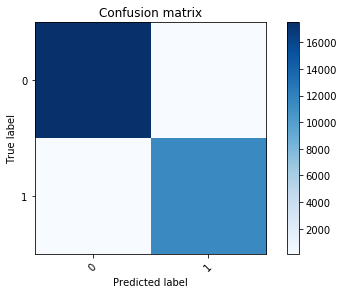

In [135]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
    
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Compute confusion matrix
cm = confusion_matrix(y_true, cnn_pred)
print(cm)

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, outcome)
plt.show()

## Best Fully Connected Neural Network
Our best FNN model was made with a function that randomized every hyperparameter when building the model. Hyperparameters are described below.

In [136]:
# Best FNN hyperparameters:
# 1st layer - sigmoid activation
# 2 hidden layers
# Hidden Layer 1 - 42 neurons - sigmoid activation
# Hidden Layer 2 - 10 neurons - relu activation
# Optimizer - adam

fnn_best = load_model("fnn_3.hdf5")

y_true = np.argmax(fnn_y_test,axis=1)
fnn_pred = fnn_best.predict(fnn_x_test)
fnn_pred = np.argmax(fnn_pred,axis=1)

score = metrics.accuracy_score(y_true, fnn_pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, fnn_pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, fnn_pred))

Accuracy: 0.9919634577738091
Averaged F1: 0.991951655338471
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17589
           1       1.00      0.98      0.99     11528

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



[[17567    22]
 [  212 11316]]
Plotting confusion matrix


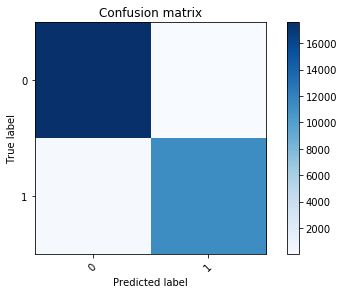

In [137]:
# Compute confusion matrix
cm = confusion_matrix(y_true, fnn_pred)
print(cm)

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, outcome)
plt.show()

# Conclusion
### Our best overall model was a CNN with three sets of Conv2D and MaxPooling2D layers and relu activation used on all Conv2D layers. The fully connected layers had 2048 neurons and relu activation. The optimizer used was adam.
### This CNN had a F1 score of 0.994.
### Our best Fully Connected NN came close with and F1 score of 0.992.
### Both models are better at predicted a normal connection than an intrusion which makes sense since there were so many different kinds of intrusions and they were all lumped into one label with each other.
### From our observation it seems that a CNN is consistently a better approach to this problem. All of our CNN models had F1 and accuracies above 0.90. While a Fully-Connected NN can work well, the hyperparameters could drastically affect performance, especially when the sgd optimizer was used from our findings.